<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Comparing Clustering Algorithm Effectiveness

_Authors: Kiefer Katovich (SF)_

---

In this lab, you'll test three of the clustering algorithms we've covered on seven data sets that are specifically designed to evaluate clustering algorithm effectiveness.

This lab is exploratory and heavy on data visualization.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

---

### 1) Load the data sets.

Each of the seven data sets have three columns:

    x
    y
    label
    
Because they each only have two variables, they're easy to examine visually. You’ll compare the “true” labels for the data to the clusters the algorithms find.

In [4]:
flame = pd.read_csv('./datasets/flame.csv')
agg = pd.read_csv('./datasets/aggregation.csv')
comp = pd.read_csv('./datasets/compound.csv')
jain = pd.read_csv('./datasets/jain.csv')
path = pd.read_csv('./datasets/pathbased.csv')
r15 = pd.read_csv('./datasets/r15.csv')
spiral = pd.read_csv('./datasets/spiral.csv')

---

### 2) Plot each of the data sets with colored true labels.

The data sets have different numbers of unique labels, so you'll need to figure out how many there are for each and color the clusters accordingly (for example, `r15` has 15 different clusters).

In [5]:
r15.head(3)

,x,y,label
0,9.802,10.132,1
1,10.350,9.768,1
2,10.098,9.988,1


In [6]:
r15.label.value_counts()

15    40
14    40
13    40
12    40
11    40
10    40
9     40
8     40
7     40
6     40
5     40
4     40
3     40
2     40
1     40
Name: label, dtype: int64

In [7]:
# Plotting function.
### Scratch space for building k-means step by step example

def  plot_label(df, label = 'label'):
    num_labels = df[label].unique() # identify the unique labels per df and for plotting 
    plt.figure(figsize = (6,6))
    for i in num_labels:
        plt.scatter(df[df[label] == i]['x'], df[df[label] == i]['y'], label = i) # assign X and y values as we cycle thru each df 
    plt.legend(loc = 'best fit')
    plt.show()

/Users/admin/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/legend.py:641: UserWarning: Unrecognized location "best fit". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


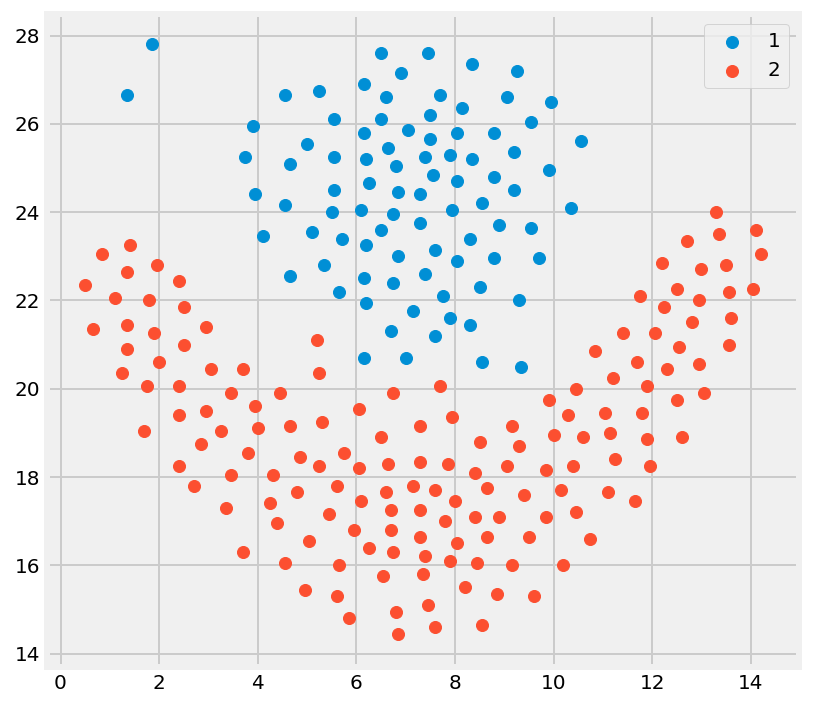

In [8]:
plot_label(flame)

/Users/admin/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/legend.py:641: UserWarning: Unrecognized location "best fit". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


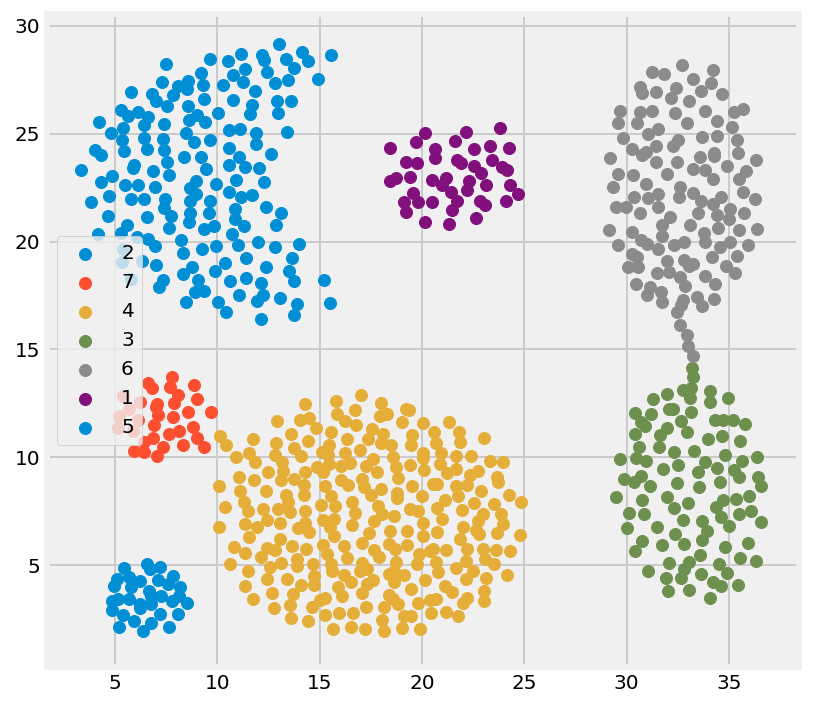

In [9]:
plot_label(agg)

/Users/admin/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/legend.py:641: UserWarning: Unrecognized location "best fit". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


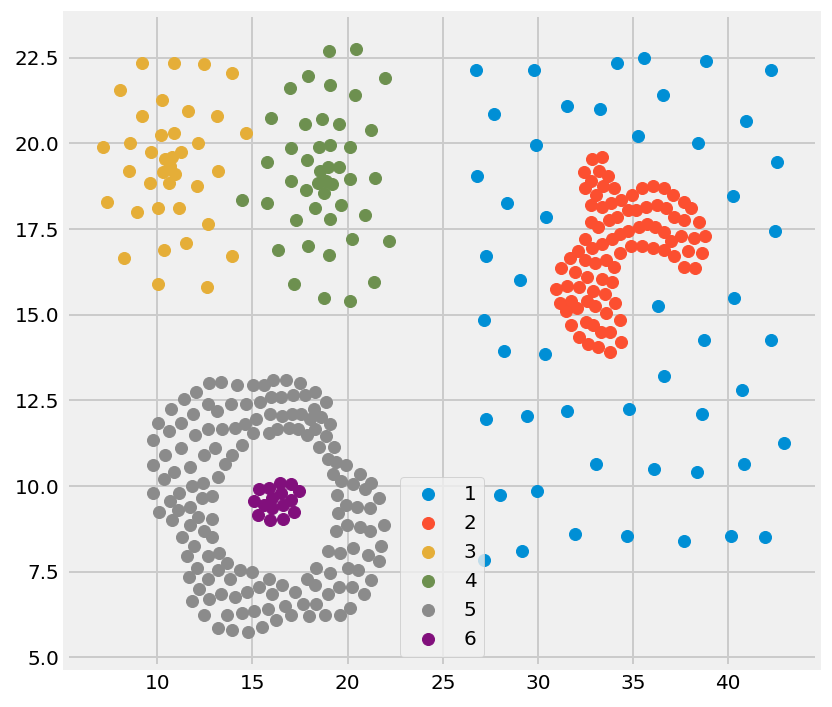

In [10]:
plot_label(comp)

/Users/admin/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/legend.py:641: UserWarning: Unrecognized location "best fit". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


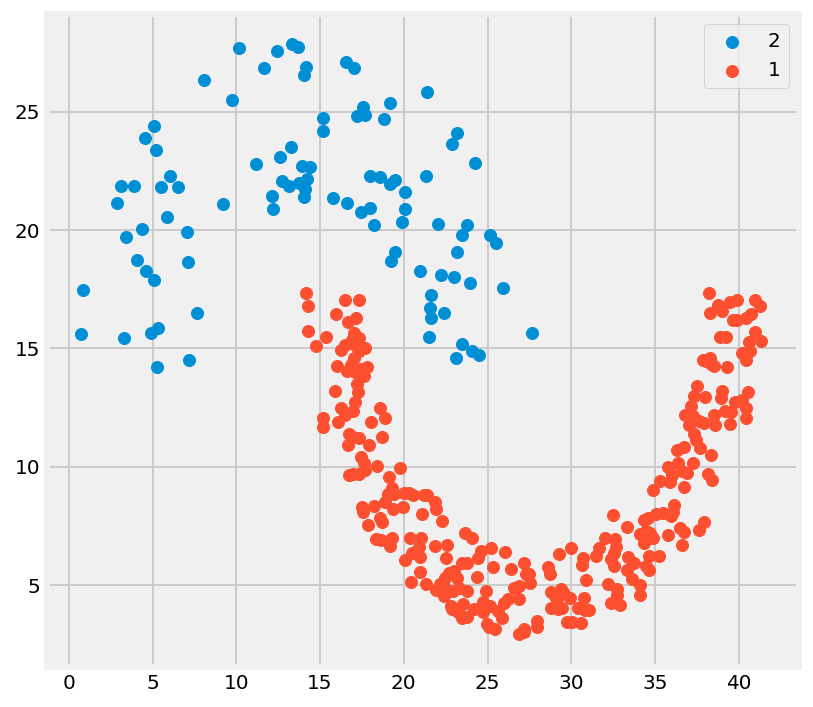

In [11]:
plot_label(jain)

/Users/admin/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/legend.py:641: UserWarning: Unrecognized location "best fit". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


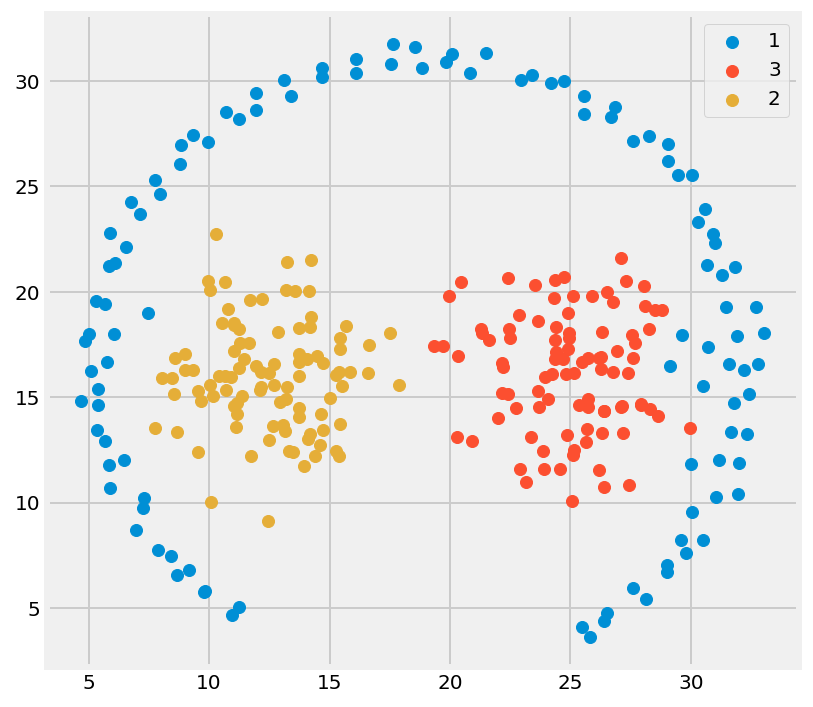

In [12]:
plot_label(path)

/Users/admin/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/legend.py:641: UserWarning: Unrecognized location "best fit". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


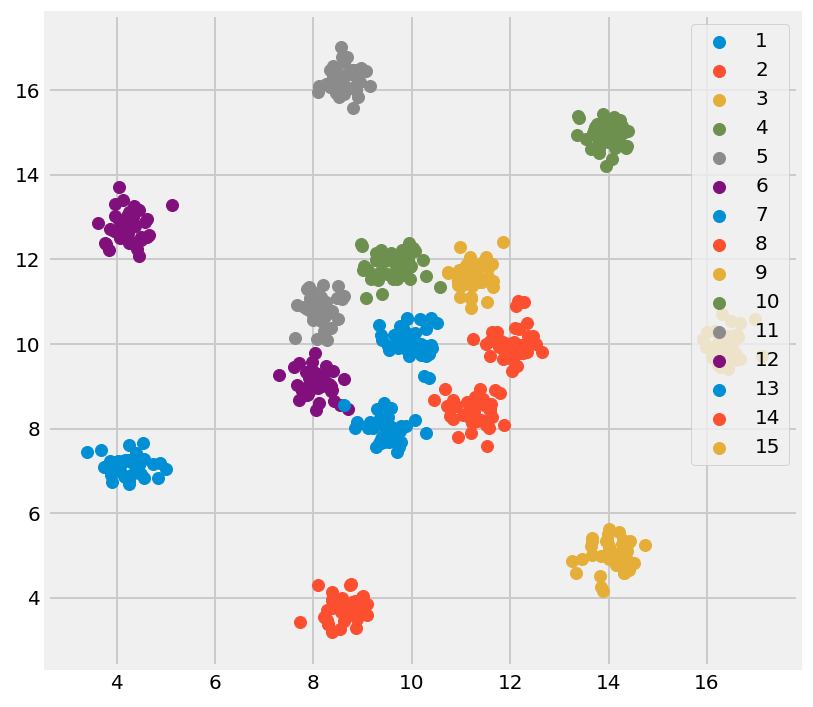

In [13]:
plot_label(r15)

/Users/admin/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/legend.py:641: UserWarning: Unrecognized location "best fit". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


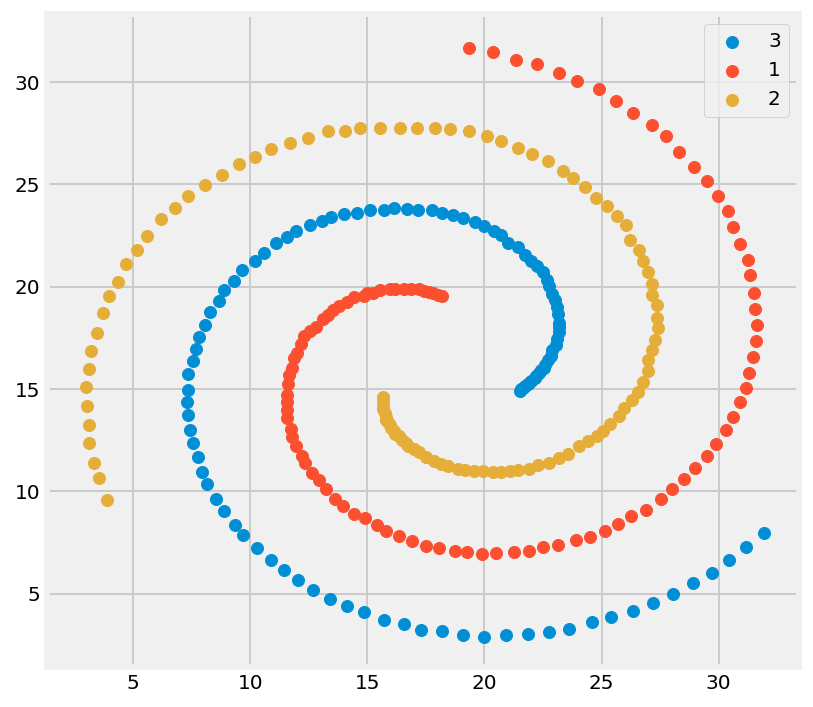

In [14]:
plot_label(spiral)

In [ ]:
# Plot each data set with the true cluster labels.

---

### 3) Write a plotting function (or functions) to compare the performance of the three clustering algorithms.

Load in the three clustering algorithms we covered earlier in the class.

    K-means: k-means clustering.
    Agglomerative clustering: hierarchical clustering (bottom up).
    DBSCAN: density-based clustering.
    
Your function(s) should allow you to visually examine the effects of changing different parameters in the clustering algorithms. The parameters you should explore, at minimum, are:

    K-means:
        n_clusters
    Agglomerative clustering:
        n_clusters
    DBSCAN
        eps
        min_samples
        
Feel free to explore other parameters for these models.


In [24]:
# Write a function that will plot the results of the three
# clustering algorithms for comparison.

In [15]:
def cluster_compare(df, num_clusters, eps, min_samp):
    
    plt.figure(figsize=(8,4))

    plt.subplot(1, 3, 1)
    km = KMeans(n_clusters=num_clusters)    
    km.fit(ss.fit_transform(df[['x', 'y']]))
    plt.title("KMeans")
    plt.scatter(df['x'], df['y'], c = km.labels_, cmap="gist_rainbow")
    plt.xticks(())
    plt.yticks(());
    
    plt.subplot(1, 3, 2)
    ag_c = AgglomerativeClustering(n_clusters=num_clusters)
    ag_c.fit(ss.fit_transform(df[['x', 'y']]))
    plt.title("Agglomerative")
    plt.scatter(df['x'], df['y'], c = ag_c.labels_, cmap="gist_rainbow")
    plt.xticks(())
    plt.yticks(());

    plt.subplot(1, 3, 3)
    dbs = DBSCAN(eps=eps, min_samples=min_samp)
    dbs.fit(ss.fit_transform(df[['x', 'y']]))
    plt.title("DBSCAN")
    plt.scatter(df['x'], df['y'], c = dbs.labels_, cmap="gist_rainbow")
    plt.xticks(())
    plt.yticks(());
    plt.tight_layout() 
    plt.show()
    return


### 4) Tinkering with clustering parameters.

In the following sections, look at how the parameters affect the clustering algorithms and try to get clusters that make sense. There is no right answer here, as these are unsupervised techniques.

---

### 4.A) Find good parameters for the `flame` data set.

Which algorithm (visually) performs best?

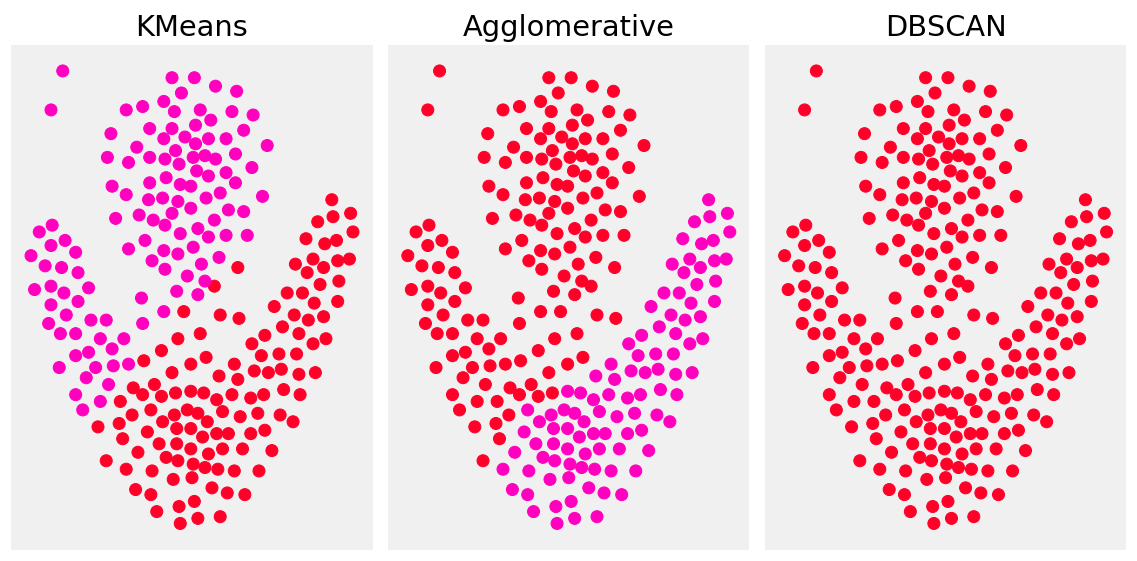

In [29]:
# A:
cluster_compare(flame, num_clusters=2, eps=.02, min_samp=2)

K Means and Agglomerative is better than DBScan

---

### 4.B) Find good parameters for the `agg` data set.

Which algorithm (visually) performs best?

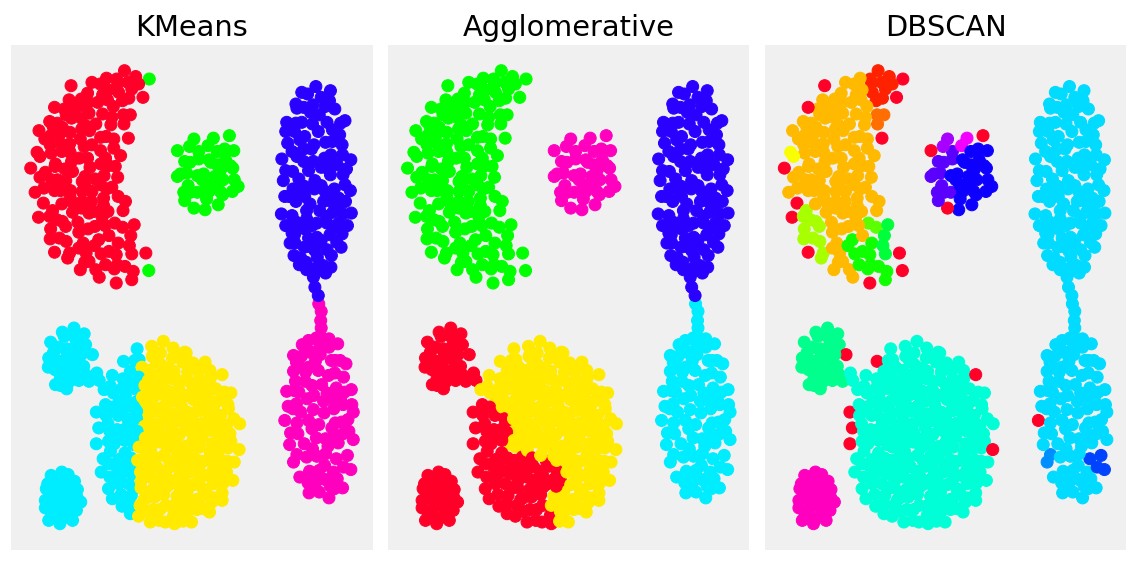

In [30]:
# A:
cluster_compare(agg, num_clusters=6, eps=0.1, min_samp=2)

KMeans

---

### 4.C) Find good parameters for the `comp` data set.

Which algorithm (visually) performs best?

In [31]:
comp.label.value_counts()

5    158
2     92
1     50
4     45
3     38
6     16
Name: label, dtype: int64

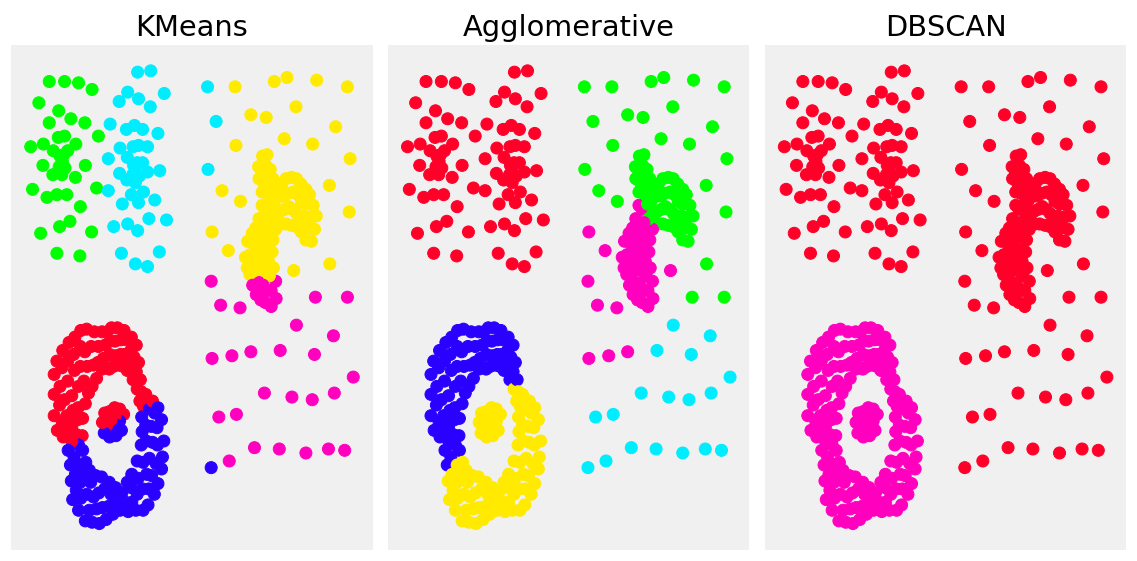

In [32]:
# A:
cluster_compare(comp, num_clusters=6, eps=0.5, min_samp=2)

Agg


---

### 4.D) Find good parameters for the `jain` data set.

Which algorithm (visually) performs best?

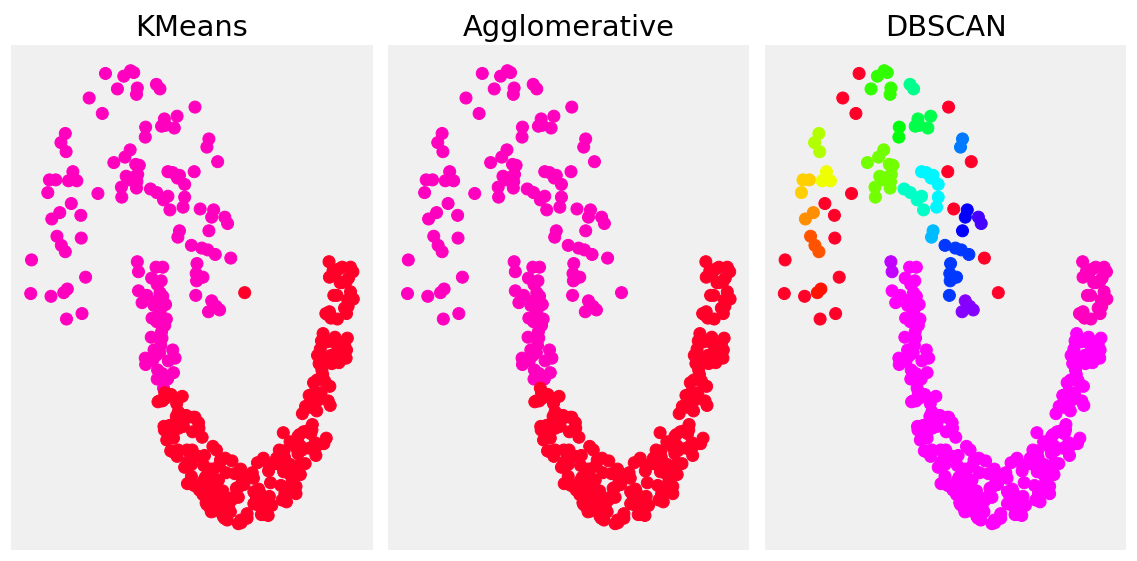

In [59]:
# A:
cluster_compare(jain, num_clusters=2, eps=.15, min_samp=2)

kmeans and agg

---

### 4.E) Find good parameters for the `pathbased` data set.

Which algorithm (visually) performs best?

In [33]:
path.label.value_counts()


1    110
2     97
3     93
Name: label, dtype: int64

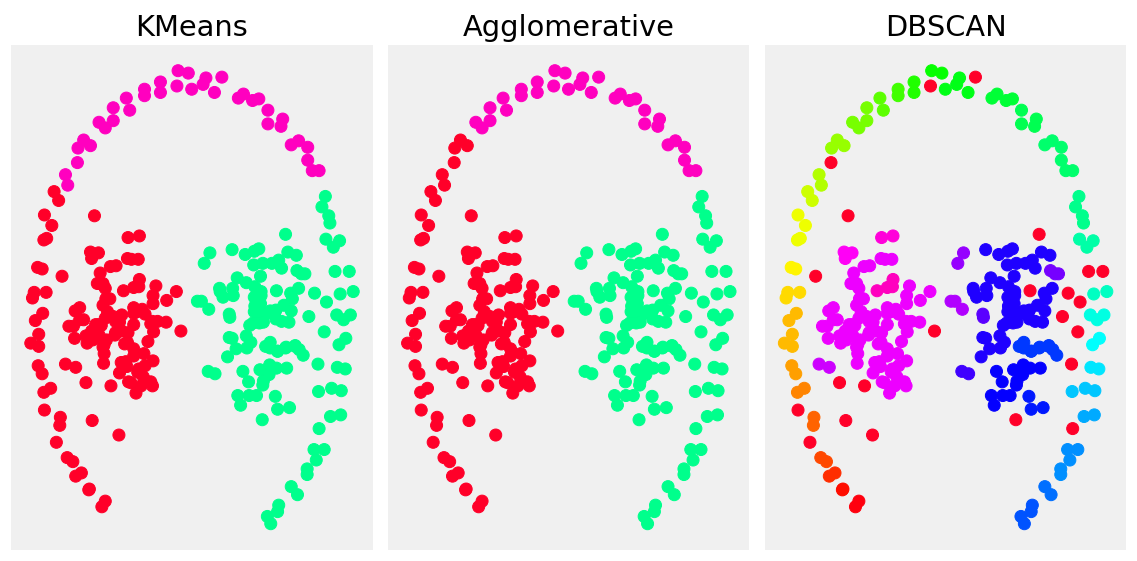

In [34]:
# A:
cluster_compare(path, num_clusters=3, eps=.15, min_samp=2)

kmeans

---

### 4.F) Find good parameters for the `r15` data set.

Which algorithm (visually) performs best?

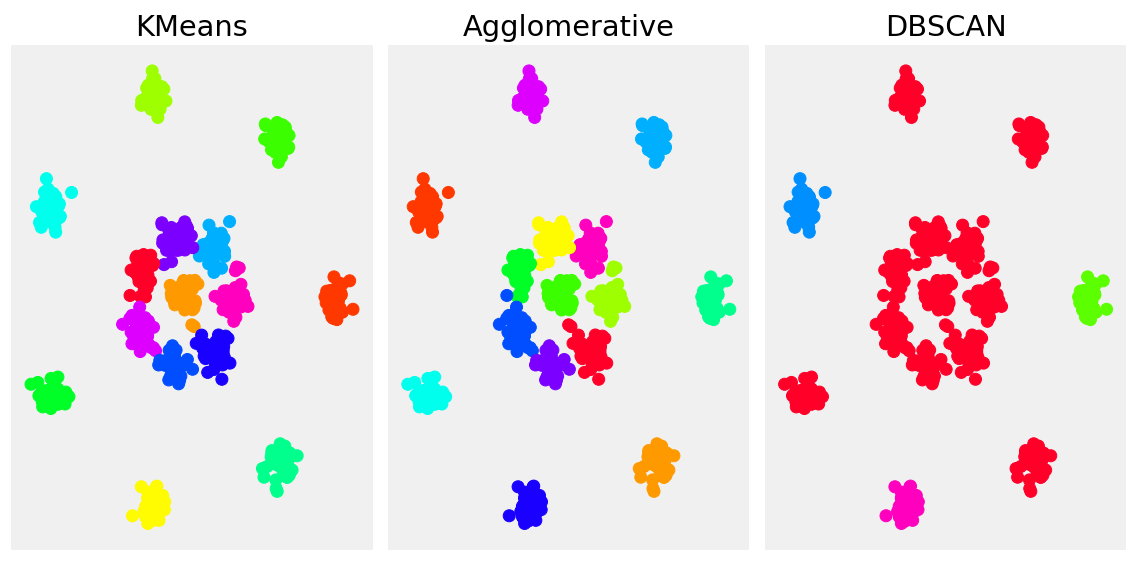

In [25]:
# A:
cluster_compare(r15, num_clusters=15, eps=1, min_samp=5)

Kmeans

---

### 4.G) Find good parameters for the `spiral` data set.

Which algorithm (visually) performs best?

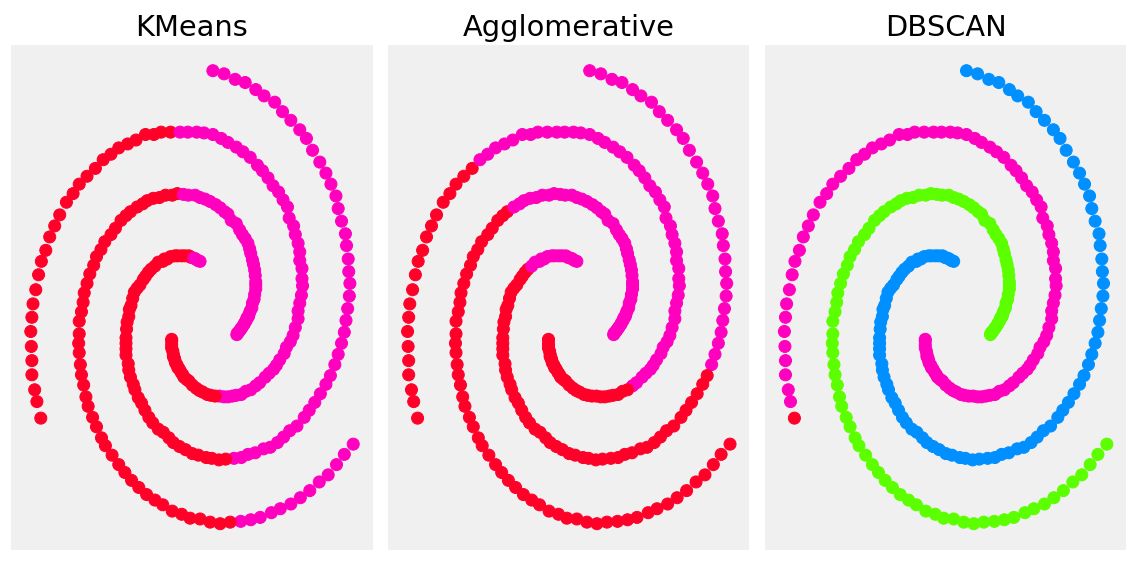

In [62]:
# A:
cluster_compare(spiral, num_clusters=2, eps=.15, min_samp=2)

---

## 5) [Bonus] Explore other clustering algorithms.

Scikit-learn comes with a variety of unsupervised clustering algorithms, some of which we haven’t covered in class. Two algorithms that may be particularly interesting to you are:

1) [Affinity propagation](http://scikit-learn.org/dev/modules/clustering.html#affinity-propagation) finds clusters by sending messages from a group of points to other points. Points group into clusters based on a "damping factor." Affinity propagation’s main appeal is that the number of clusters doesn’t need to be specified by the user (like DBSCAN).
2) [Birch](http://scikit-learn.org/dev/modules/clustering.html#birch) finds clusters with a tree-based algorithm that is somewhat reminiscent of decision trees. It evaluates branches/nodes on a tree that best describe the data's features.

In [ ]:
# A: